In [1]:
import os
from monai.data import DataLoader, Dataset

from cspoco.utils.plot import plot_projections
from cspoco.transforms.default import get_default_train_transforms
from cspoco.utils import get_data_dict

In [2]:
data_dir = 'data/semantic_3D/train'

In [3]:
train_files = get_data_dict(os.path.join(data_dir, 'img'), os.path.join(data_dir, 'gt'))
train_files[:3]

[{'image': 'data/semantic_3D/train/img/line_img_00000.tif',
  'label': 'data/semantic_3D/train/gt/line_img_00000.tif'},
 {'image': 'data/semantic_3D/train/img/line_img_00001.tif',
  'label': 'data/semantic_3D/train/gt/line_img_00001.tif'},
 {'image': 'data/semantic_3D/train/img/line_img_00002.tif',
  'label': 'data/semantic_3D/train/gt/line_img_00002.tif'}]

In [4]:
train_transforms = get_default_train_transforms(roi_size=(16, 64, 64), return_val=False)

image shape: torch.Size([16, 64, 64]), label shape: torch.Size([16, 64, 64])


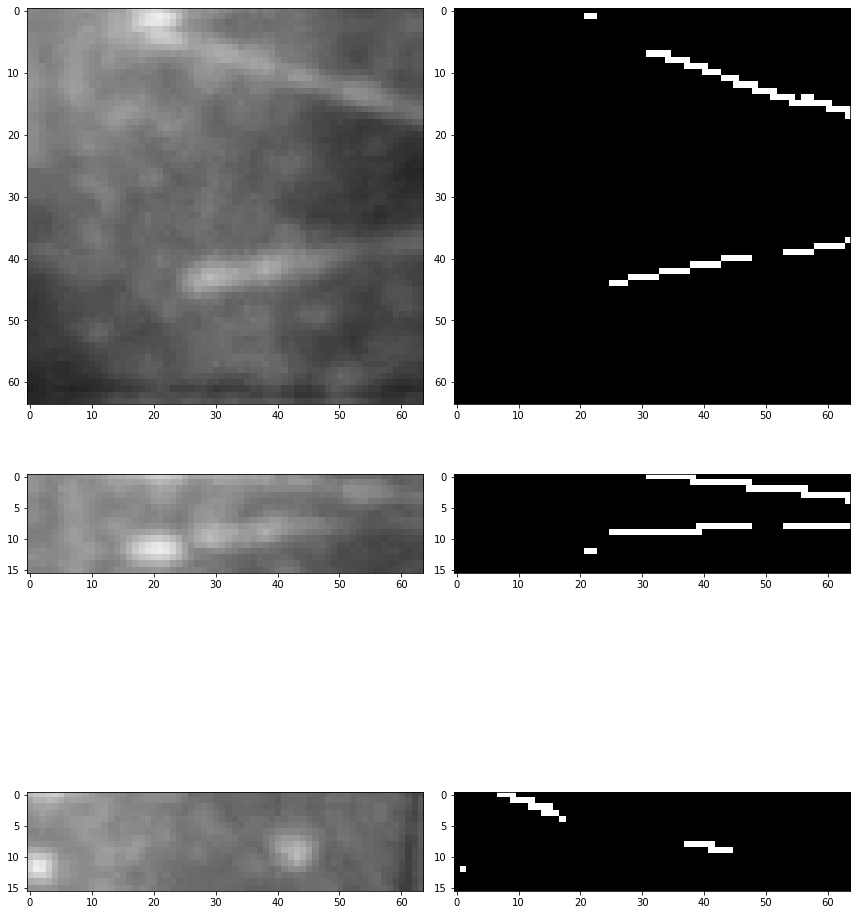

In [5]:
ds = Dataset(data=train_files, transform=train_transforms)
dl = DataLoader(ds, batch_size=2)
batch = next(iter(dl))
image, label = (batch["image"][0][0], batch["label"][0][0])
print(f"image shape: {image.shape}, label shape: {label.shape}")

plot_projections([image, label], panel_size=6)